Table_of_Contents

Introduction

Gather Data

Enhanced Twitter Archive
Image Predictions File
Download Tweet JSON Data

Assess Data

Archive

Predictions

JSON Data

 Summary

Clean Data

Analyze  and visualize Data

Introduction

project: Wrangle and Analyse Data

In this project, we will wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The main purpose of this project is to use real world data to wrangle (gather, assess, clean) and then apply analysis with visualizations. The data used was from the Twitter account ‘WeRateDogs’ (@dog_rates) which “rates people's dogs with a humorous comments about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.” (source, Udacity)

The following three datasets will be used in this project.

Enhanced Twitter Archive

Additional Data via the Twitter API

Image Predictions File

In [17]:
# Importing necessary libraries .
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import requests
import json
import os
import re
import warnings
warnings.simplefilter('ignore')

Data Wrangling 

1. Data Gathering 

The first part of our data wrangling process will data gathering or collection. As mentioned above, in this project, we are going to use three datasets as follows:

In [8]:
#First dataset, Handed to us by udacity
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [17]:
#Second dataset, to be downlaoded
#Tweet image predictions hosted on Udacity's servers(File downloaded):
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [18]:
#Saving   image-predictions.tsv locally:
with open(os.path.join(os.getcwd(), 
         url.split('/')[-1]), mode='wb') as file2:
    file2.write(response.content)

In [19]:
# Loading  the the image dataset into a DataFrame
df_img = pd.read_csv("image-predictions.tsv", sep="\t" )

The next dataset will be collected from tuitter through their API using tweetpy. The first part here will be to get 
out authentication keys and secrets from tuitter through application

In [12]:
consumer_key = 'VG8X3GveYFfuvhbB4IhJpWmH1'
consumer_secret = 'BZV33mD6Esc46DR3n8CdhUP2X3rHNDa0FxIuW6CltQmeftu6cl'
access_token = '1551888398364942338-NQx7JlqMiO6riEp2ebesUtcjrpP41k'
access_secret = 'tfgwSAEQ52psHBU4ztDy9T1diagdkZLEbY0tLLNIzesaa'

In [21]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)



api = tweepy.API(auth, wait_on_rate_limit=True)

In [23]:
list_tweet_ids = df_archive.tweet_id.values
len(list_tweet_ids)

2356

In [24]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
# We then fetch all tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in list_tweet_ids:   
    try:
#        start = time.time()
        list_of_tweets.append(api.get_status(each_id))
#        end = time.time()
#        print(end - start)
    except Exception as e:
        cant_find_tweets_for_those_ids.append(each_id)
#        print(str(each_id))

In [25]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [26]:
#third dataset
df_tweet = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [28]:
df_tweet

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


2. Assessing 



The second aprt of our data wrangling processing is assessing the data collected for quality and tidiness. This process will be 
done programmatically and visually. 

Assessing the archive dataset

In [29]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [30]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [31]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Assessing the Image prediction dataset

In [32]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


df_img.describe()

Assessing the Twitter dataset

In [34]:
df_tweet.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [35]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [36]:
df_tweet.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


After assesing the three datsets avove both visually and programmatically, the following issues can be identified

Quality

df_archive Table

1. we are interested in original tweets. Alot of retweets present

2. Alot of Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,      retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.

3. tweet_id has dtype int64,  should be object(to long to be int)
 
4. timestamp should be a datetime64 dtype not Object
 
 Column name floofer should be spelled 'floof'(lookup from the dictionary)
 
 
5. Missing information for dog stages.
 
6. rating column has some abstract values. Hence we need to look at the column
 
7. Some tweets had "\&amp" combined with ";" which is the html code to display just the ampersand
 
df_tweet Table
 
8. The types of dogs in columns p1, p2, and p3 have both uppercase and lowercase.
 
9. The tweet_id column should be dtype object instead of int64.
 
 Tidiness
 
 1. The df_tweet and df_archive table should be merged into a single table.
 
 2. The source column in df_archive table untidy(many attributes in a single column) 
 
 3. The threee tables will be condence to one mega table.

3. Data cleaning 

This is the third stage in data wrangling. Here, we will clean the issues identified above one after the other

First, we make a copy of our dataset

In [83]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [85]:
archive_clean = df_archive.copy()
image_clean = df_img.copy()
tweet_clean = df_tweet.copy()

3.1. df_archive: we need just original tweets and not retweets hence we remove from table retweets and replies keeping only original tweets
    
Define
    
Find  retweets and replies using the retweeted_status_id and in_reply_to_status_id columns and remove from the DataFrame

Code

In [87]:

retweets = archive_clean[pd.notnull(archive_clean['retweeted_status_id'])].index
replys = archive_clean[pd.notnull(archive_clean['in_reply_to_status_id'])].index

In [88]:
archive_clean.drop(index=retweets, inplace=True)
archive_clean.drop(index=replys, inplace=True)

Test

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

3.2.  df_archive: Missing values in columns and unnecessary columns
    
Define

Remove columns with missing values using dropna() method. Also, use the drop() method to drop source column from table as well

Code

In [52]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [97]:
archive_clean.dropna(axis='columns',how='any', inplace=True)
archive_clean.drop(columns='source', inplace=True)

Test

In [40]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


3.3.  Fixing Column Names

df_tweet: unifying column names
archive_clean: column names

Define
In the tweet_clean table the column name id_str changed to tweet_id using the rename() function.
In the archive_clean table, column name floofer should be "floof" to match the dog stage associated with it using the rename() function. The columns rating_numerator and rating_denominator should be shortend to "rate_num" and "rate_denom" to make it less wordy.

Code

In [98]:
tweet_clean.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)
archive_clean.rename(columns={"floofer": "floof", 
                                         "rating_numerator": "rate_num",
                                         "rating_denominator": "rate_denom"}, inplace=True)

Test

In [55]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rate_num', 'rate_denom', 'name',
       'doggo', 'floof', 'pupper', 'puppo'],
      dtype='object')

In [43]:
tweet_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

3.4.   Datatypes for the:
image_clean: tweet_id dtype "string"
    
archive_clean: timestamp dtype "datetime"
    
archive_clean: tweet_id dtype "string"

Define

In the image_clean table, lets change the dtype of column tweet_id from int64 to object using the astype() function.

In the archive_clean table, change the dtype of column timestamp from object to datetime using pandas to_datetime()
function.

In the archive_clean table, change the dtype of column tweet_id from int64 to object using the astype() function.

Code

In [99]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

Test


In [45]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2356 non-null   object             
 1   timestamp   2356 non-null   datetime64[ns, UTC]
 2   text        2356 non-null   object             
 3   rate_num    2356 non-null   int64              
 4   rate_denom  2356 non-null   int64              
 5   name        2356 non-null   object             
 6   doggo       2356 non-null   object             
 7   floof       2356 non-null   object             
 8   pupper      2356 non-null   object             
 9   puppo       2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


3.5 image_clean: dog breeds uniformity
    
Define

In the image_clean table, the dogbreeds in the p1, p2, and p3 are converting all the names to lowercase letters.

Code

In [100]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

Test

In [60]:
image_clean.p1.head()

0    welsh_springer_spaniel
1    redbone               
2    german_shepherd       
3    rhodesian_ridgeback   
4    miniature_pinscher    
Name: p1, dtype: object

In [61]:
image_clean.p2.head()

0    collie            
1    miniature_pinscher
2    malinois          
3    redbone           
4    rottweiler        
Name: p2, dtype: object

In [62]:
image_clean.p3.head()

0    shetland_sheepdog  
1    rhodesian_ridgeback
2    bloodhound         
3    miniature_pinscher 
4    doberman           
Name: p3, dtype: object

3.6 archive_clean: clean up text column
    
Define

In the archive_clean table, change the html ampersand code from "&amp ;" to "&" in the text column
Remove the "/n " the newline symbol
Remove ending url link.

Code

In [101]:
archive_clean['text'] = archive_clean.text.str.replace("&amp;", "&")
archive_clean['text'] = archive_clean.text.str.replace("\n", " ")
archive_clean['text'] = archive_clean.text.str.replace(r"http\S+", "")
archive_clean['text'] = archive_clean.text.str.strip()

Test

In [64]:
archive_clean.query("text == '&amp;'").any()

tweet_id      False
timestamp     False
text          False
rate_num      False
rate_denom    False
name          False
doggo         False
floof         False
pupper        False
puppo         False
dtype: bool

In [65]:
archive_clean.head()

,tweet_id,timestamp,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,None,None,None


3.7 archive_df: fix some of the ratings columns
    
Define

In the archive_clean table, use several methods such as extractall(), query(), contains(), etc to check for misextraction of the ratings.



In [102]:
archive_clean.reset_index(inplace=True, drop=True)

In [103]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rate_num']]

,text,rate_num
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26


In [68]:
hyphen_table = archive_clean.text.str.extractall(r"(\d+\d*\/\d+)")
hyphen_table.head(10)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10
5,0,13/10
6,0,13/10
7,0,13/10
8,0,13/10


In [69]:
match_1 = hyphen_table.query("match == 1")
match_1.head()

,,0
,match,
55,1,13/10
313,1,13/10
561,1,11/10
766,1,11/10
784,1,14/10


In [70]:
#rating confused with 9/11(September 11th)
archive_clean.iloc[853, 3] = 14
archive_clean.iloc[853, 4] = 10

#rating confused with 4/20(Weed Day)
archive_clean.iloc[948, 3] = 13
archive_clean.iloc[948, 4] = 10

#rating confused with phrase 50/50 split
archive_clean.iloc[985, 3] = 11
archive_clean.iloc[985, 4] = 10

#rating confused with 7/11 which is name of convience store
archive_clean.iloc[1426, 3] = 10
archive_clean.iloc[1426, 4] = 10
#rating confused with 1/2 representing "half"
archive_clean.iloc[2076, 3] = 9
archive_clean.iloc[2076, 4] = 10

In [104]:
doubles_list = archive_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]
double_index = doubles_list.index

In [105]:
archive_clean.iloc[[41, 528, 586, 1474], [2,3,4]]

,text,rate_num,rate_denom
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


In [73]:
archive_clean.iloc[41, 3] = 13.5
archive_clean.iloc[528, 3] = 9.75
archive_clean.iloc[586, 3] = 11.27
archive_clean.iloc[1474, 3] = 11.26

Test

In [74]:
archive_clean.iloc[[45, 528, 586, 1474], [2,3,4]]

,text,rate_num,rate_denom
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5.00,10
528,This is Koda. He dug a hole and then sat in it because why not. Unamused by the bath that followed. 12/10,9.75,10
586,RT @dog_rates: This is Tucker. He would like a hug. 13/10 someone hug him,11.27,10
1474,BREAKING PUPDATE: I've just been notified that (if in U.S.) this dog appears to be operating the vehicle. Upgraded to 10/10. Skilled af,11.26,10


In [75]:
archive_clean.iloc[[853, 948, 985, 1426, 2076], [2,3,4,5]]

,text,rate_num,rate_denom,name
853,This is Louie. He's had a long day. Did a lot of pupper things. Also appears to be rather heckin pettable. 11/10,14.0,10,Louie
948,Here's a doggo trying to catch some fish. 8/10 futile af (vid by @KellyBauerx),13.0,10,None
985,This is Boomer. He's self-baptizing. Other doggo not ready to renounce sins. 11/10 spiritually awakened af,11.0,10,Boomer
1426,This is Carter. He wakes up in the morning and pisses excellence. 10/10 best there is plain and simple,10.0,10,Carter
2076,Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet,9.0,10,None


3.8 archive_df: removing. doubles
    
Define

In the archive_clean table, there are some tweets with two dogs being rated, therefore those will be dropped because it violates the rules of tidiness.
Code

In [76]:
doubles_list = archive_clean.iloc[[588, 797, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047]]
double_index = doubles_list.index

In [77]:
archive_clean.drop(axis='index', index=double_index, inplace=True)

Test

In [ ]:
archive_clean.info()

3.9 Combine(Merge)

Define

Take both the archive_clean and tweet_clean tables and merge into one table using the join() method on the columns tweet_id.

Code

In [106]:
df_semi = archive_clean.join(tweet_clean.set_index('tweet_id'), on='tweet_id')

Test

In [107]:
df_semi.sample(5)

,tweet_id,timestamp,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo,retweet_count,favorite_count
863,739485634323156992,2016-06-05 15:54:48+00:00,This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle,6,10,Kyle,None,None,None,None,3309,7887
1371,685943807276412928,2016-01-09 21:58:42+00:00,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all,8,10,the,None,None,pupper,None,696,1801
67,878057613040115712,2017-06-23 01:10:23+00:00,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved,14,10,Emmy,None,None,None,None,7181,42876
1246,693942351086120961,2016-01-31 23:42:03+00:00,This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides. 10/10 sick interior,10,10,Kobe,None,None,None,None,413,1896
1285,690989312272396288,2016-01-23 20:07:44+00:00,We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy,12,10,None,None,None,None,None,3282,6513


3.10. Joining Data Frames

Define

Take the newly df_semi table and combine with the image_clean table using join() or concat() method on the tweet_id column.

Code

In [108]:
#Combining the dataframes
df = df_semi.join(image_clean.set_index('tweet_id'), on='tweet_id')

Test

In [109]:
#verifying that everything is fine
df

,tweet_id,timestamp,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,None,None,None,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,None,None,None,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,None,None,None,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,None,None,None,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5,10,None,None,None,None,None,...,1.0,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2093,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6,10,a,None,None,None,None,...,1.0,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2094,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9,10,a,None,None,None,None,...,1.0,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2095,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7,10,a,None,None,None,None,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2097 non-null   object             
 1   timestamp       2097 non-null   datetime64[ns, UTC]
 2   text            2097 non-null   object             
 3   rate_num        2097 non-null   int64              
 4   rate_denom      2097 non-null   int64              
 5   name            2097 non-null   object             
 6   doggo           2097 non-null   object             
 7   floof           2097 non-null   object             
 8   pupper          2097 non-null   object             
 9   puppo           2097 non-null   object             
 10  retweet_count   2097 non-null   int64              
 11  favorite_count  2097 non-null   int64              
 12  jpg_url         1971 non-null   object             
 13  img_num         1971 non-null   f

we can still see some missing values in our combine data frame. Since we need the results for further anaysis, it will be preferable we clean it here: cleaning Missing Data on our combine df to have a clean dataset

Define

Removing the missing rows from the merged tables using the drop() method.

Code

In [111]:
df_copy = df.copy()

In [112]:
#indentifying columns with these missing values and grouping them
drop_col1 = df_copy[pd.isnull(df_copy['jpg_url'])].index
drop_col2 = df_copy[pd.isnull(df_copy['retweet_count'])].index


In [113]:
#Dropping these mssing values will be idle since we dont even want to have anything with retweets
df_copy.drop(index=drop_col1, inplace=True)
df_copy.drop(index=drop_col2, inplace=True)

Test

In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1971 non-null   object             
 1   timestamp       1971 non-null   datetime64[ns, UTC]
 2   text            1971 non-null   object             
 3   rate_num        1971 non-null   int64              
 4   rate_denom      1971 non-null   int64              
 5   name            1971 non-null   object             
 6   doggo           1971 non-null   object             
 7   floof           1971 non-null   object             
 8   pupper          1971 non-null   object             
 9   puppo           1971 non-null   object             
 10  retweet_count   1971 non-null   int64              
 11  favorite_count  1971 non-null   int64              
 12  jpg_url         1971 non-null   object             
 13  img_num         1971 non-null   f

In [116]:
#Everything Looks good so we can safe our result in a master csv file for analysis
df_copy.to_csv(path_or_buf='master.csv', index=False)

Analysis and Visualization

In [10]:
#load our wrangled master file
master_df= pd.read_csv('master.csv')



Questions:
    
what are the top 6 popular dog names used in the tweets?

In which onth and Year did the highest number of tweets occure?

Top 6 rating numbers in the dataset?

In [5]:
master_df.head(3)

,tweet_id,timestamp,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [6]:
#checking to be sure everthing is fine before we start analysis
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1971 non-null   int64  
 1   timestamp       1971 non-null   object 
 2   text            1971 non-null   object 
 3   rate_num        1971 non-null   int64  
 4   rate_denom      1971 non-null   int64  
 5   name            1971 non-null   object 
 6   doggo           1971 non-null   object 
 7   floof           1971 non-null   object 
 8   pupper          1971 non-null   object 
 9   puppo           1971 non-null   object 
 10  retweet_count   1971 non-null   int64  
 11  favorite_count  1971 non-null   int64  
 12  jpg_url         1971 non-null   object 
 13  img_num         1971 non-null   float64
 14  p1              1971 non-null   object 
 15  p1_conf         1971 non-null   float64
 16  p1_dog          1971 non-null   bool   
 17  p2              1971 non-null   o

From the information above:

we need to convert out timestamp column to datetime to ease our analysis.

Since Tweeter data is time specific, we will also convert out timestamp column to index columnso that we can enjoy this time series features.


In [12]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [13]:
master_df = master_df.set_index('timestamp')

Statistics 

Lets begin our analysis by viewing some  summary or descriptive statistics with  quantitative metrics in our dataset. 

In [14]:
master_df.describe()

,tweet_id,rate_num,rate_denom,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.360418e+17,12.223237,10.477423,2784.449518,8949.106545,1.201928,0.594558,1.345850e-01,6.016556e-02
std,6.752810e+16,41.634034,6.853275,4697.662893,12267.799790,0.559020,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758656e+17,10.000000,10.000000,628.500000,1997.000000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.088343e+17,11.000000,10.000000,1367.000000,4147.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.880951e+17,12.000000,10.000000,3239.000000,11402.500000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


It will be interesting to fine the correlation between the different variable. The correlation chart is useful for finding connections between variables, especially with hypothesis testing

In [15]:
master_df.corr()

,tweet_id,rate_num,rate_denom,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.024917,-0.017619,0.406375,0.655888,0.215396,0.104148,0.121573,-0.001059,0.125866,-0.046983,0.098119
rate_num,0.024917,1.000000,0.185722,0.014664,0.010876,-0.003137,-0.006962,-0.030783,-0.019657,-0.036142,-0.004241,-0.030868
rate_denom,-0.017619,0.185722,1.000000,-0.018270,-0.025708,-0.016962,0.008023,-0.004820,-0.031914,-0.006093,0.006861,-0.000530
retweet_count,0.406375,0.014664,-0.018270,1.000000,0.913014,0.108322,0.053674,0.006693,-0.018573,0.015231,-0.043431,0.009329
favorite_count,0.655888,0.010876,-0.025708,0.913014,1.000000,0.138330,0.078291,0.053040,-0.021465,0.059847,-0.052545,0.040529
img_num,0.215396,-0.003137,-0.016962,0.108322,0.138330,1.000000,0.202765,0.032335,-0.156895,0.056981,-0.137720,0.059112
p1_conf,0.104148,-0.006962,0.008023,0.053674,0.078291,0.202765,1.000000,0.127782,-0.510649,0.143939,-0.707916,0.119669
p1_dog,0.121573,-0.030783,-0.004820,0.006693,0.053040,0.032335,0.127782,1.000000,0.110050,0.639529,0.048624,0.561321
p2_conf,-0.001059,-0.019657,-0.031914,-0.018573,-0.021465,-0.156895,-0.510649,0.110050,1.000000,0.096359,0.480698,0.064274
p2_dog,0.125866,-0.036142,-0.006093,0.015231,0.059847,0.056981,0.143939,0.639529,0.096359,1.000000,0.031648,0.558876


The correlation coefficient beteen retweet_count and favorite_count is 0.929604, which is close to 1 and positive demonstrating a strong positive correlation bewteen those two variables.
Another coefficient worth mentioning is the between p1_conf and p3_conf which is -0.706755, demonstrating a negative semi-strong relationship. This can be as shown the plots below.

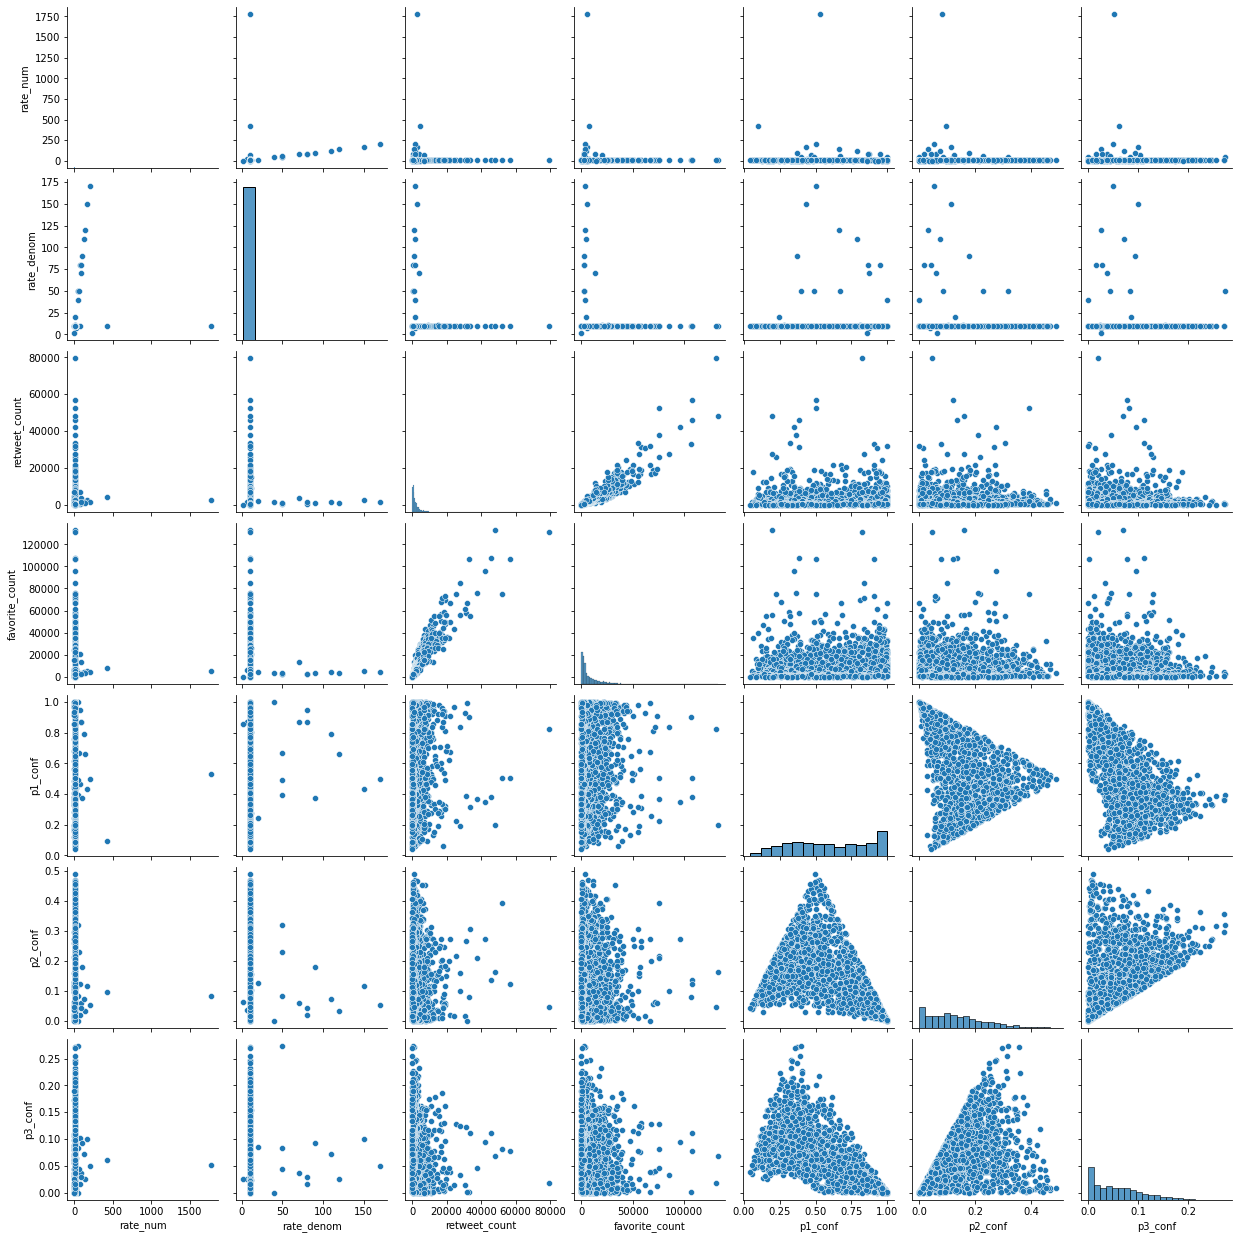

In [18]:
sb.pairplot(master_df, vars=["rate_num", "rate_denom", "retweet_count", "favorite_count", "p1_conf", "p2_conf", "p3_conf"]);

Question 1: What are the most common dog namess used?

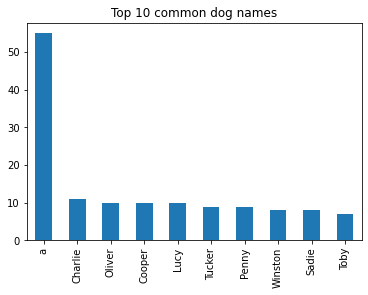

In [19]:
top_dogs_name=master_df.name.value_counts()[1:11]
top_dogs_name.plot(kind='bar');
plt.title('Top 10 common dog names');
plt.show()

The top common dog names used in the tweet archives are: Charlie, Oliver, Copper, Lucy, Tucker, Penny as shown in the visualization 
    above. 

Question 2: In which Month and Year did the highest number of tweets occurs?

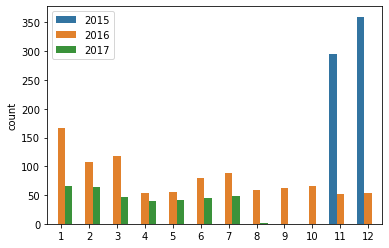

In [20]:
tweets_per_month=master_df.groupby([master_df.index.year.values,master_df.index.month.values]).sum()
sb.countplot(data= tweets_per_month, hue= master_df.index.year.values, x =master_df.index.month.values);

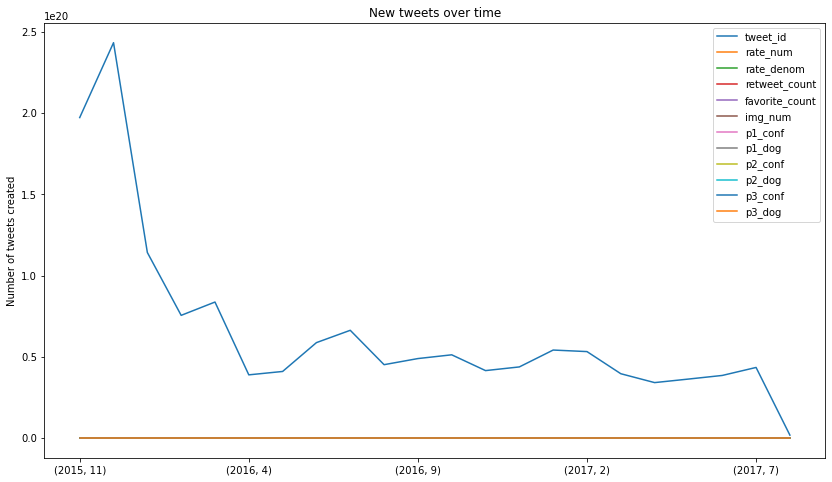

In [21]:

tweets_per_month.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

From the graphs above, we can see that, the highest number of tweets per month occured in November and December 2015
with December having the highest number of tweets in that 2015.

Question 3: What are the top 6 most used rating numbers?

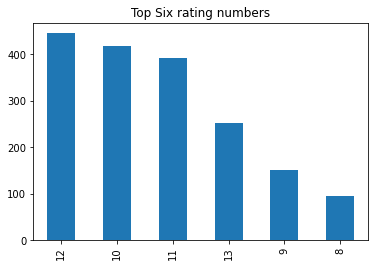

In [22]:
master_df.rate_num.value_counts()[:6].plot(kind='bar');
plt.title('Top Six rating numbers')
plt.show()

From the graph above, we can see that the top 6 rating numbers are: 12, 10,11,13, 9 and 8 with rating 12 being the hghest

Conclusion:

Results:
    We were able to fine the most common dog names,
    
    We also found out the the highest number of tweets occured in December, 2015
    
    We were able to identify top rating numbers with rating 12 being the highest rating number